### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score



In [5]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the dataset using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Making predictions and reporting the score on the test dataset
y_pred = knn.predict(X_test_scaled)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNeighborsClassifier on the test dataset: {score:.2f}")

Accuracy of KNeighborsClassifier on the test dataset: 0.96


2) Repeat Step 1 using pipelines and report the score.

In [6]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline with MinMaxScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Making predictions and reporting the score on the test dataset
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNeighborsClassifier using pipeline on the test dataset: {score:.2f}")

Accuracy of KNeighborsClassifier using pipeline on the test dataset: 0.96


3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor.

In [7]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline with MinMaxScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the grid of values for 'n_neighbors' to test
parameters = {
    'knn__n_neighbors': range(1, 21)  # Testing values from 1 to 20
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')

# Fitting grid search on the training data
grid_search.fit(X_train, y_train)

# Best number of neighbors
best_n_neighbors = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f"Best number of neighbors: {best_n_neighbors}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

# Evaluating the best model on the test data
test_score = grid_search.score(X_test, y_test)
print(f"Accuracy on the test dataset: {test_score:.2f}")

Best number of neighbors: 8
Best cross-validation accuracy: 0.96
Accuracy on the test dataset: 0.96


4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y.
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



Data Shape: (731, 11)
Data Types: season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object
Column Names: Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


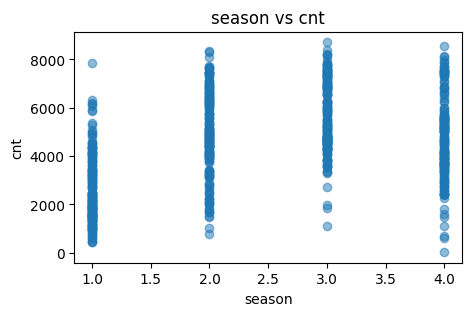

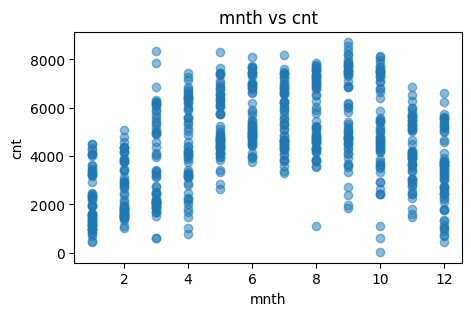

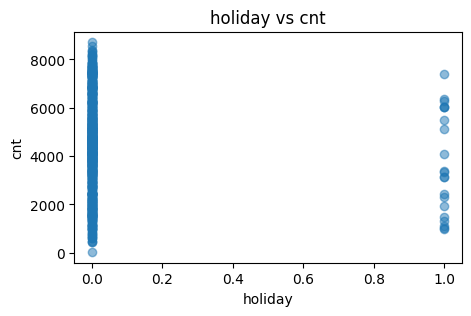

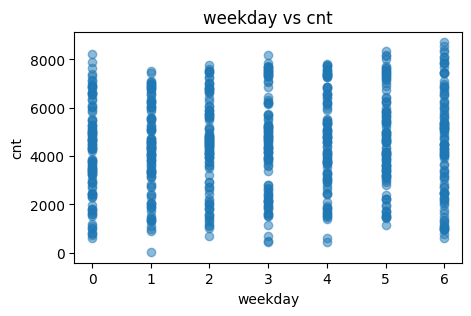

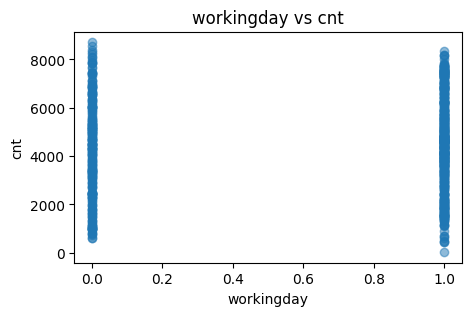

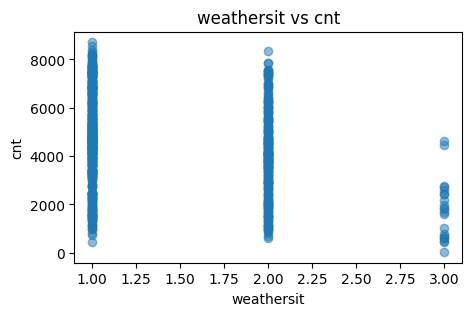

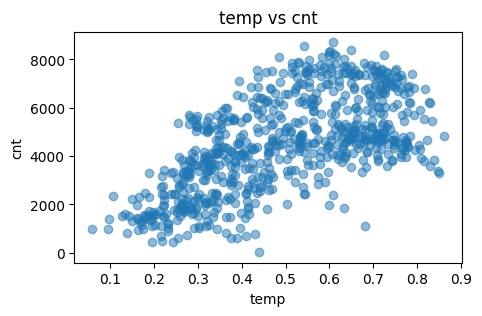

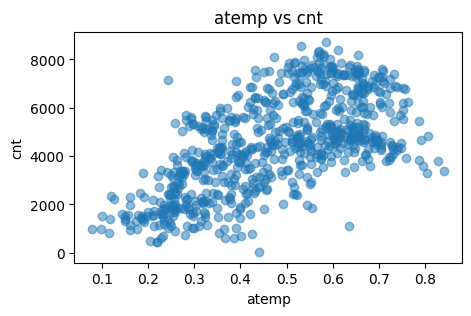

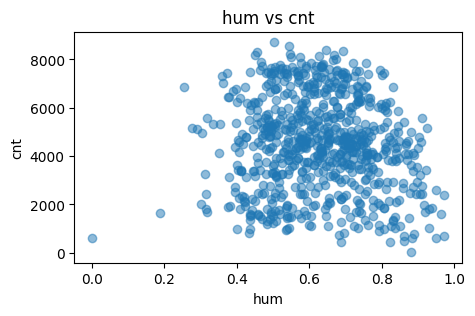

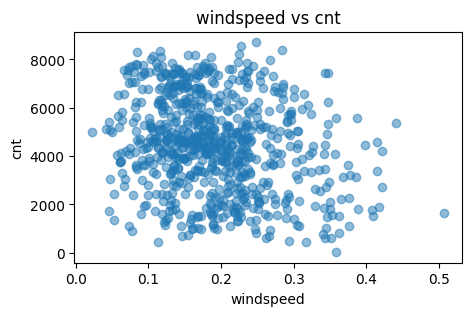

R2 score on the test dataset: 0.58


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# 1. Import the dataset
data = pd.read_csv('bike_day_raw.csv')

# 2. Inspect data
print("Data Shape:", data.shape)
print("Data Types:", data.dtypes)
print("Column Names:", data.columns)

# 3. Create scatterplots of features against the target variable (assuming 'cnt' is the target)
target = 'cnt'
features = data.columns.drop(target)
for feature in features:
    plt.figure(figsize=(5, 3))
    plt.scatter(data[feature], data[target], alpha=0.5)
    plt.title(feature + ' vs ' + target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

# 4. Identify numeric and non-numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.drop(target)
non_numeric_features = data.select_dtypes(exclude=['int64', 'float64']).columns

# 5. Create preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
    ('scaler', StandardScaler())  # Scale data
])

# 6. Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_numeric_features)
    ])

# 7. Create the full pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# 8. Split data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Fit the model and report the score
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R2 score on the test dataset: {score:.2f}")